Portfolio Optimization and Asset Allocation
---------------

- Email - ugwuozorcollinsemezie@gmail.com
- LinkedIn - https://www.linkedin.com/in/collins-ugwuozor-48791a15/
- GitHub - https://github.com/ClassicCollins


I constructed a four-asset portfolio consisting of three value stocks and two growth stocks. The value stocks include two technology companies and one pharmaceutical company, while the growth stocks are both from the tech industry. The portfolio comprises the following assets: "AMD," "GOOGL," "MSFT," "NVDA," and "PFE."

In [ ]:
# Importing the neccessary libraries
import pandas as pd
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
import yfinance as yf
from datetime import datetime
from numpy.linalg import inv

# Step 1: Computing the Markowitz portfolio optimization

## Using brute force Method

In [ ]:
### define the stocks from which you want the data (via tickers)
assets = ["AMD","GOOGL", "MSFT", "NVDA","PFE"]
# Define the dates
start_date = "2015-01-01" #You can choose diff date
#end_date = "2022-01-01"
# Today's date
today = datetime.today().strftime('%Y-%m-%d') # You can choose diff date
# Create an empty dataframe
prices = pd.DataFrame()
# Get the  "Adj Close" data from Yahoo Finance
def YahooData(dataframe_1,assets,start_date,end_date):
    for i in assets:
        dataframe_1[i] = yf.download(i, start=start_date, end=end_date)['Adj Close']
    return dataframe_1
df1_prices = YahooData(prices,assets, start_date,today)
df1_prices

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AMD,GOOGL,MSFT,NVDA,PFE
Date,,,,,
2015-01-02,2.670000,26.477501,40.620659,4.833628,21.552944
2015-01-05,2.660000,25.973000,40.247124,4.751988,21.435997
2015-01-06,2.630000,25.332001,39.656406,4.607916,21.614861
2015-01-07,2.580000,25.257500,40.160259,4.595908,21.910669
2015-01-08,2.610000,25.345501,41.341690,4.768796,22.357832
...,...,...,...,...,...
2023-07-28,112.959999,132.580002,338.369995,467.500000,36.070000
2023-07-31,114.400002,132.720001,335.920013,467.290009,36.060001
2023-08-01,117.599998,131.550003,336.339996,465.070007,35.610001


In [ ]:
# We transform the data to its logarithmic returns
df1_returns = np.log(df1_prices).diff()
# Drop the first row
df1_returns = df1_returns.dropna()
df1_returns

,AMD,GOOGL,MSFT,NVDA,PFE
Date,,,,,
2015-01-05,-0.003752,-0.019238,-0.009238,-0.017034,-0.005441
2015-01-06,-0.011342,-0.024989,-0.014786,-0.030787,0.008309
2015-01-07,-0.019195,-0.002945,0.012625,-0.002609,0.013593
2015-01-08,0.011561,0.003478,0.028994,0.036928,0.020203
2015-01-09,0.007634,-0.012286,-0.008441,0.004020,0.004605
...,...,...,...,...,...
2023-07-28,0.016603,0.024278,0.022868,0.018349,-0.003598
2023-07-31,0.012667,0.001055,-0.007267,-0.000449,-0.000277
2023-08-01,0.027588,-0.008855,0.001249,-0.004762,-0.012558


In [ ]:
# Using brute force to iterate we create containers(arrays)
iterations = 5000
#Creating containers for the arrays
return_array = np.zeros(iterations)
volatility_array = np.zeros(iterations)
sharpe_ratio_array = np.zeros(iterations)
#wt_array = np.zeros(iterations, len(df2.columns))
weights_array = np.zeros((iterations,len(df1_prices.columns)))

In [ ]:
for i in range(iterations):
    w = np.random.random(len(df1_prices.columns))
    w = w/np.sum(w) # the sum of the weights is 1
    weights_array[i,:] = w
    return_array[i] = np.sum(df1_returns.mean()*252*w)
    volatility_array[i] = np.sqrt(np.dot(w.T,np.dot(df1_returns.cov()*252,w)))
    sharpe_ratio_array[i] = return_array[i]/volatility_array[i]

In [ ]:
result = sharpe_ratio_array.max()
result

1.116654428820437

In [ ]:
result_index = np.where(sharpe_ratio_array == result)

In [ ]:
result_index

(array([765]),)

In [ ]:
optimal_weights = weights_array[result_index[0],:]
print (  "------------AMD", "------GOOGL",   "------MSFT",   "--------NVDA",  "--------PFE-----" )
optimal_weights

------------AMD ------GOOGL ------MSFT --------NVDA --------PFE-----


array([[0.06983964, 0.01271037, 0.2935167 , 0.58124971, 0.04268358]])

In [ ]:
annual_volatility = volatility_array[result_index[0]]
annual_volatility

array([0.37018838])

In [ ]:
expected_annual_return = return_array[result_index[0]]
expected_annual_return

array([0.4133725])

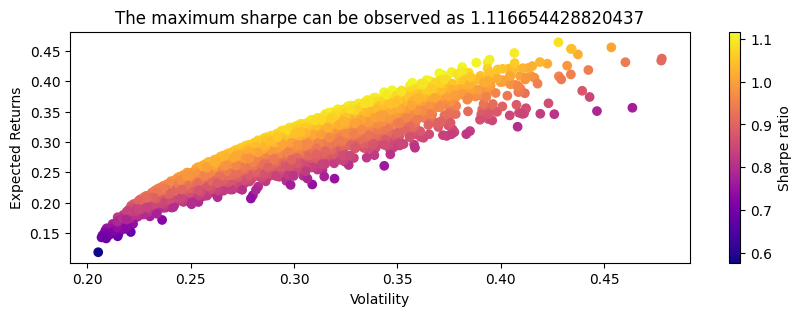

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(volatility_array,return_array,c=sharpe_ratio_array,cmap='plasma')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title("The maximum sharpe can be observed as "+str(result))
plt.show()

In [ ]:
optimal_weight1 = pd.DataFrame(optimal_weights)
optimal_weight1 = optimal_weight1.T
return1 = df1_returns*252
return1 = return1.mean().reset_index()
return_table1 = pd.concat([optimal_weight1,return1], axis=1)
return_table1.columns = ['MW Weights', 'Asset', 'MW Returns']
return_table1 = return_table1.set_index('Asset')
return_table1['MW Weights'] = return_table1['MW Weights']*100
return_table1 = return_table1
return_table1.style.format('{:,.2f}%')

,MW Weights,MW Returns
Asset,,
AMD,6.98%,0.44%
GOOGL,1.27%,0.18%
MSFT,29.35%,0.24%
NVDA,58.12%,0.53%
PFE,4.27%,0.06%


In [ ]:
print("Expected return optimal porfolio: ", f"{expected_annual_return[0]:.2%}")
print("Expected std. deviation optimal porfolio: ", f"{annual_volatility[0]:.2%}")

Expected return optimal porfolio:  41.34%
Expected std. deviation optimal porfolio:  37.02%


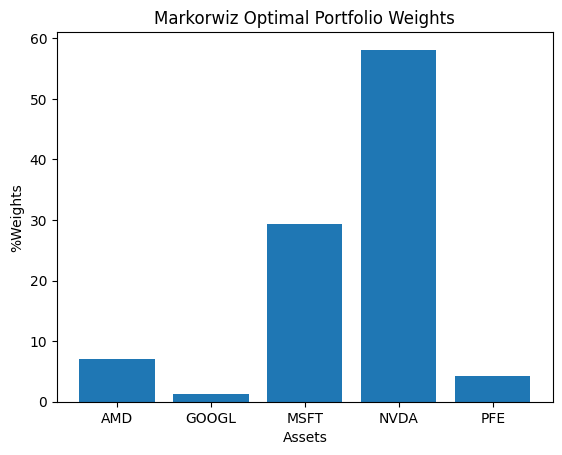

In [ ]:
plt.bar(assets, return_table1['MW Weights'])
plt.xlabel('Assets')
plt.ylabel('%Weights')
plt.title('Markorwiz Optimal Portfolio Weights')
plt.show()